# Visualize Saliency Maps

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import cv2

In [3]:
model1=tf.keras.applications.MobileNetV2(weights='imagenet')
model1.trainable=False

In [7]:
def load_image(path):
  img=tf.keras.utils.load_img(path,target_size=(224,224))
  img=tf.keras.utils.img_to_array(img)
  img_array=tf.keras.applications.mobilenet_v2.preprocess_input(img)
  img_array=np.expand_dims(img_array,axis=0)
  return tf.convert_to_tensor(img_array),img

In [22]:
image_path='/content/image.jpg'
img_tensor,original_image=load_image(image_path)

In [23]:
with tf.GradientTape() as x:
  x.watch(img_tensor)
  prediction=model1(img_tensor)
  top_class=tf.argmax(prediction[0])
  top_class_score=prediction[:,top_class]
grads=x.gradient(top_class_score,img_tensor)
saliency=tf.reduce_max(grads,axis=-1)
saliency=(saliency-tf.reduce_min(saliency))/(tf.reduce_max(saliency)-tf.reduce_min(saliency))
saliency=saliency.numpy()

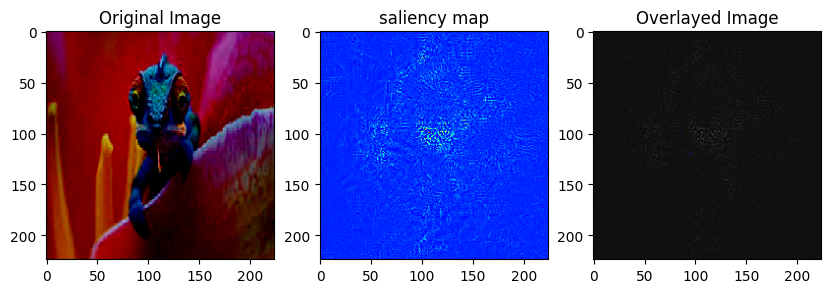

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(original_image)
plt.subplot(1,3,2)
plt.title("saliency map")
plt.imshow(np.squeeze(saliency),cmap='jet')

plt.subplot(1,3,3)
plt.title("Overlayed Image")
saliency_resized = cv2.resize(np.uint8(255*np.squeeze(saliency)), (original_image.shape[1], original_image.shape[0]))
saliency_colored = cv2.cvtColor(saliency_resized, cv2.COLOR_GRAY2BGR)
overlayed=cv2.addWeighted(np.array(original_image,dtype=np.uint8),0.6,saliency_colored,0.4,0)
plt.imshow(overlayed)
plt.show()